<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/ml_zoomcamp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

**Churn Prediction**

classification can be binary or multiclass classification.
g(x) = y (y can either be 1 or 0) 1 meaning customer might churn and 0 means wont churn.

In this lesson we will see about a telecom dataset where customers might churn because fo many reasons. so we take a previous months dataset and observe the data and build a model which can predict whether a customer will churn or not.

## 3.1 Data Preperation

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [76]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')

In [77]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [78]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [79]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [105]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [106]:
df.totalcharges = df.totalcharges.fillna(0)

In [82]:
df.churn.head()

,churn
0,no
1,no
2,yes
3,no
4,yes


In [83]:
df.churn = (df.churn == 'yes').astype(int)

In [84]:
df.churn.value_counts()

,count
churn,
0,5174
1,1869


# 3.2 Validation Framework

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
df_full_train,df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [110]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [111]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [112]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.3 EDA

In [113]:
df_full_train.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [114]:
df_full_train = df_full_train.reset_index(drop = True)

In [115]:
df_full_train.churn.value_counts()

,count
churn,
0,4113
1,1521


In [116]:
df_full_train.churn.value_counts(normalize=True)

,proportion
churn,
0,0.730032
1,0.269968


In [117]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

around 27% of user are churning in the whole dataset

In [120]:
df_full_train.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [121]:
numerical = ['tenure','monthlycharges','totalcharges']

In [122]:
categorical = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']

In [123]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


# 3.4 Feature importance: Churn rate and risk ratio

In [124]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [125]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [126]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [127]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [128]:
global_churn_rate

0.26996805111821087

In [136]:
partner_churn_rate_diff =  global_churn_rate -churn_no_partner
partner_churn_rate_diff_pct = churn_no_partner / global_churn_rate
partner_churn_rate_diff_pct,partner_churn_rate_diff

(1.2216593879412643, -0.05984095297455855)

more than gender variable the partner variable might affect the churn probability more. two variables the difference and risk ratio helps us to understand the importance of the variables.


select gender,avg(churn),avg(churn) - global_churn as diff
avg(churn)/global_churn as risk
from data
group by gender

In [138]:
for c in categorical:
  df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk'] = df_group['mean'] / global_churn_rate
  display(df_group)
  print()
  print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.5 Feature Importance: Mutual information

it tells us how much we can learn about one variable if we know the value of another variable.


In [139]:
from sklearn.metrics import mutual_info_score

In [140]:
mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [141]:
mutual_info_score(df_full_train.churn,df_full_train.gender)

0.0001174846211139946

In [144]:
mutual_info_score(df_full_train.churn,df_full_train.paymentmethod)

0.043210027531582915

In [145]:
def mutual_info_churn_score(series):
  return mutual_info_score(series,df_full_train.churn)


In [146]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


# 3.6 Feature importance: Corelation
how about numerical corelation?

correlation coefficient values of range(0 , -0.2)(0, 0.2) the correlation is low whereas in range(0.2,0.5) or (-0.2,-0.5) it is moderate and in range(0.6,1.0) or (-0.6,-1.0) it is strong.

positive - implies more the tenure more the possibility to churn
negative - implies more the tenure less the possibility of churn
zero - no effect on churn

In [148]:
df_full_train[numerical].corrwith(df_full_train.churn)


,0
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [151]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [154]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [155]:
df_full_train[df_full_train.tenure>12].churn.mean()

0.17634908339788277

# 3.7 One hot encoding

In [ ]:
#using sciki-learn to encode categgorical variables


In [156]:
from sklearn.feature_extraction import DictVectorizer

In [163]:
dicts = df_train[['gender','contract']].iloc[:10].to_dict(orient = 'records')

In [169]:
dv = DictVectorizer(sparse = False)

In [170]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [174]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=two_year', 'gender=female',
       'gender=male'], dtype=object)

In [171]:
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [176]:
train_dicts = df_train[categorical+numerical].to_dict(orient = 'records')

In [177]:
dv = DictVectorizer(sparse = False)

In [178]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [181]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [182]:
x_train = dv.fit_transform(train_dicts)

In [183]:
val_dicts = df_val[categorical+numerical].to_dict(orient = 'records')

In [184]:
x_val = dv.fit_transform(val_dicts)

# 3.9 Logistic Regression

y = g(x)
y {0,1} 0 represents negative or no churn where as 1 represents positive or churn

g(x) -> 0 - 1

"probability of x "

> it is similar to linear regression where g(x) = w0 + w1*x range(-inf,inf)

> in logistic regression g(x) sigmoid(w0 + w1*x) (0,1)











In [186]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

In [187]:
z= np.linspace(-7,7,51)

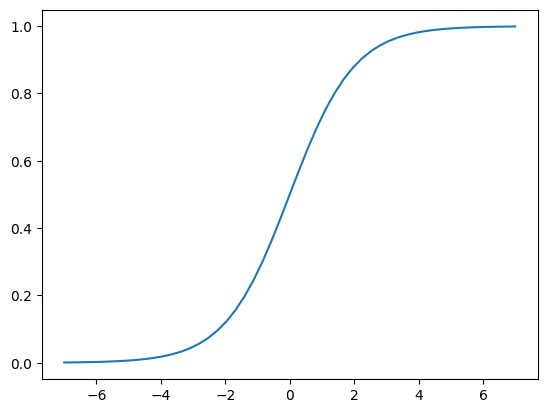

In [190]:
plt.plot(z,sigmoid(z))

In [192]:
def linear_regression(x):
  result = w0

  for j in range(len(w)):
    result = result + x[j]*w[j]
  return result



In [191]:
def logistic_regression(x):
  score = w0

  for j in range(len(w)):
    score = score + x[j]*w[j]
  result =  sigmoid(score)
  return result

# 3.9 Training Logistic regression with Scikit learn

In [193]:
from sklearn.linear_model import LogisticRegression

In [195]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
model.intercept_[0]

-0.10887511559187939

In [197]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.008,  0.062, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.058,  0.142,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [198]:
# hard predictions
model.predict(x_train)

array([0, 1, 1, ..., 1, 0, 1])

In [199]:
#soft predictions
model.predict_proba(x_train)

array([[0.90461475, 0.09538525],
       [0.32114218, 0.67885782],
       [0.36676439, 0.63323561],
       ...,
       [0.46784687, 0.53215313],
       [0.95736249, 0.04263751],
       [0.3016235 , 0.6983765 ]])

 the two columns represents the probabaility of being 0 (non churn)
and the probability of being 1 (churn)

In [200]:
y_pred = model.predict_proba(x_val)[:,1]

In [201]:
y_pred

array([0.00901895, 0.2051839 , 0.21278253, ..., 0.13656079, 0.79946403,
       0.83713076])

In [204]:
churn_decision = (y_pred >= 0.5)

In [205]:
df_val[churn_decision].customerid

,customerid
3,8433-wxgna
8,3440-jpscl
11,2637-fkfsy
12,7228-omtpn
19,6711-fldfb
...,...
1397,5976-jcjrh
1398,2034-cgrhz
1399,5276-kqwhg
1407,6521-yytyi


In [206]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [207]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [208]:
(y_val == churn_decision).mean()

0.8034066713981547

In [210]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [211]:
df_pred

,probability,prediction,actual
0,0.009019,0,0
1,0.205184,0,0
2,0.212783,0,0
3,0.542592,1,1
4,0.214236,0,0
...,...,...,...
1404,0.314294,0,0
1405,0.039430,0,1
1406,0.136561,0,0
1407,0.799464,1,1


In [213]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [214]:
df_pred

,probability,prediction,actual,correct
0,0.009019,0,0,True
1,0.205184,0,0,True
2,0.212783,0,0,True
3,0.542592,1,1,True
4,0.214236,0,0,True
...,...,...,...,...
1404,0.314294,0,0,True
1405,0.039430,0,1,False
1406,0.136561,0,0,True
1407,0.799464,1,1,True


In [215]:
df_pred.correct.mean()

0.8034066713981547

# 3.10 Model Interpretation


In [219]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.476,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.008,
 'onlinebackup=no': 0.062,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.265,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.059,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [220]:
small = ['contract','tenure','monthlycharges']

In [221]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [222]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [223]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [224]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [225]:
x_train_small = dv_small.transform(dicts_train_small)
x_val_small = dv_small.transform(dicts_val_small)

In [226]:
model_small = LogisticRegression()
model_small.fit(x_train_small,y_train)

LogisticRegression()

In [232]:
w0 = model_small.intercept_[0]
w0

-2.4779575969847394

In [228]:
w = model_small.coef_[0]

In [229]:
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [231]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [235]:
# for two_year contract person
-2.47 + (-0.948) + 60*0.027 +24*(-0.036)

-2.662

In [236]:
sigmoid(_)

0.0652532368002715

 the above part is we are adding the base w0 + w1*x1 + w2*x2 +w3*x3



> x1 is the contract


>  x2 is the monthlycharges



>x3 is the tenure




In [240]:
# for month-month contract
-2.47 + 0.971*1 + 0.027*50 + (-0.036)*1

-0.18500000000000003

In [241]:
sigmoid(_)

0.4538814589542204

# 3.11 Using the model

In [243]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient = 'records')


In [244]:
dv = DictVectorizer(sparse = False)
x_full_train = dv.fit_transform(dicts_full_train)

In [245]:
y_full_train = df_full_train.churn.values

In [247]:
model = LogisticRegression()
model.fit(x_full_train,y_full_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [248]:
dicts_test = df_test[categorical+numerical].to_dict(orient = 'records')

In [249]:
x_test  = dv.transform(dicts_test)

In [250]:
y_pred = model.predict_proba(x_test)[:,1]

In [251]:
churn_decision = (y_pred >= 0.5)

In [252]:
(churn_decision == y_test).mean()

0.8105039034776437

In [254]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [256]:
x_small = dv.transform([customer])

In [259]:
model.predict_proba(x_small)[:,1]

array([0.48465122])

In [260]:
y_test[10]

0

In [ ]:
#so it is predicting well


In [262]:
customer2 = dicts_test[-1]
customer2

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [263]:
x_small2 = dv.transform([customer2])

In [264]:
model.predict_proba(x_small2)[:,1]

array([0.62162033])

In [267]:
y_test[-1]

1